In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
data = sm.datasets.get_rdataset("AirPassengers").data
print(data.head())

          time  value
0  1949.000000    112
1  1949.083333    118
2  1949.166667    132
3  1949.250000    129
4  1949.333333    121


In [8]:
ts = data['value']

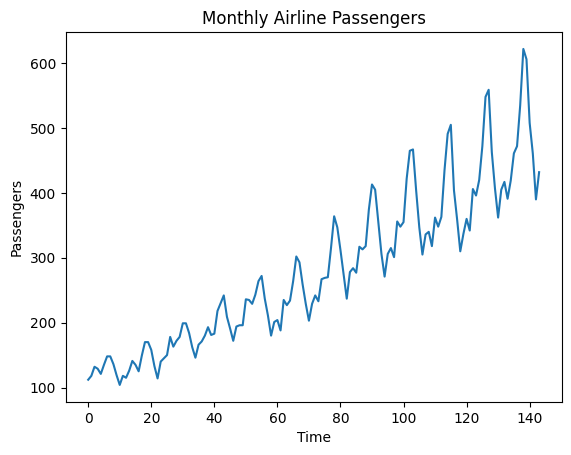

In [9]:
plt.plot(ts)
plt.title("Monthly Airline Passengers")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()

In [10]:
adf_stat, p_value, *_ = adfuller(ts)
print(f"ADF Statistic: {adf_stat}")
print(f"p-value: {p_value}")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


In [15]:
model = ARIMA(ts, order=(1, 1, 1))
result = model.fit()

In [16]:
print(result.summary)

<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x7c7348215bb0>>


In [17]:
forecast = result.forecast(steps=12)
print(forecast)

144    475.735059
145    454.996073
146    464.830415
147    460.167010
148    462.378378
149    461.329756
150    461.827008
151    461.591213
152    461.703026
153    461.650005
154    461.675148
155    461.663225
Name: predicted_mean, dtype: float64


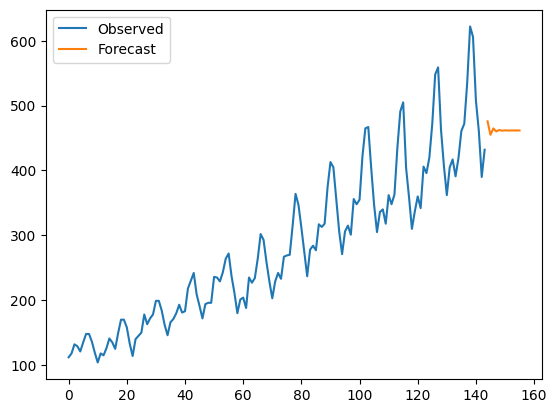

In [19]:
plt.plot(ts, label="Observed")
plt.plot(range(len(ts), len(ts) +12), forecast, label="Forecast")
plt.legend()
plt.show()